In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import skimage
import cv2
import numpy as np
from skimage import io
from skimage import color

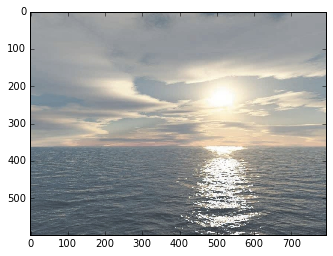

In [2]:
imsource = io.imread('test/P3-source.jpg')
plt.imshow(imsource)

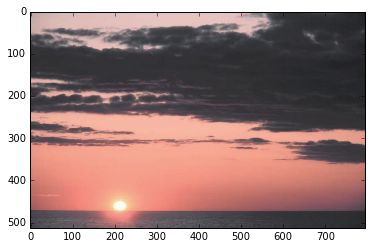

In [3]:
imtarget = io.imread('test/P3-target.jpg')
plt.imshow(imtarget)

In [4]:
def mycolortransfer(I, J):
    imsource_lab = color.rgb2lab(skimage.img_as_float(I))
    imtarget_lab = color.rgb2lab(skimage.img_as_float(J))
    
    def transfer(source, target):
        return (target.std() / source.std()) * (source - source.mean()) + target.mean()

    l_out = transfer(imsource_lab[:,:,0], imtarget_lab[:,:,0])
    a_out = transfer(imsource_lab[:,:,1], imtarget_lab[:,:,1])
    b_out = transfer(imsource_lab[:,:,2], imtarget_lab[:,:,2])
    
    return color.lab2rgb(np.stack((l_out, a_out, b_out), axis=2))

/u/s/i/sidharth/anaconda2/lib/python2.7/site-packages/skimage/color/colorconv.py:901: UserWarning: Color data out of range: Z < 0 in 46 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
/u/s/i/sidharth/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


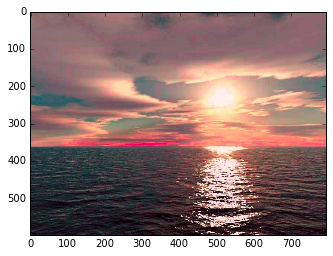

In [5]:
output = mycolortransfer(imsource, imtarget)
io.imsave('output/P3-out.jpg', output)
plt.imshow(output)